In [29]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

## Compartment Model for Epidemic

<img src="Model.png" alt="Getting started" />

## Differential Equations for the model

In [30]:
def dxdt(compartment, t, *args):
    V ,NV ,CV ,CNV ,CQ ,I ,Im ,H ,R = compartment
    mu , b,d,alpha, alpham, sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma, zeta2, dR ,N = args
    
    dV_dt = b*V - d*V - alpha* V * I/N - alpham* V * Im/N + zeta*CV + mu*NV + zeta2*CQ
    dNV_dt = b*NV - d*NV - alpha* NV * I/N - alpham* NV * Im/N + zeta*CNV - mu*NV
    dCV_dt = alpha* V * I/N + alpham* V * Im/N -sigma1* CV -  sigma1m* CV - kq* CV -zeta*CV
    dCNV_dt = alpha* NV * I/N + alpham* NV * Im/N -sigma0* CNV -  sigma0m* CNV - kq* CNV -zeta*CNV
    dI_dt = sigma1* CV + sigma0 *CNV - gamma* I - eta* I
    dIm_dt = sigma1m* CV + sigma0m *CNV - gammam* Im - etam* Im
    dCQ_dt = kq * (CV + CNV) - sigmaq* CQ - zeta2*CQ

    dH_dt = eta *I+etam *Im -gammah *H + sigmaq *CQ
    dR_dt = gamma *I + gammam * Im + gammah* H - dR* R
    
    return dV_dt, dNV_dt, dCV_dt, dCNV_dt, dCQ_dt, dI_dt, dIm_dt, dH_dt, dR_dt

## Importing actual data for cases in INDIA

In [31]:
Worldometer_data = pd.read_csv('worldometer.csv')

world_data = Worldometer_data['active case']
wave1 = world_data[125:380]
wave2 = world_data[410:600]
wave1.max()


1016312

In [32]:
# Convert the list to a pandas series
s1 = pd.Series(wave1)
s2 = pd.Series(wave2)

# Calculate the 3-point moving average
first_wave = s1.rolling(window=7).mean()
second_wave = s2.rolling(window=7).mean()

# plt.figure(figsize=(15,10))
# # Create a plot with the original data and the moving average
# plt.plot(s1, label='Original Data')
# plt.plot(first_wave, label='Moving Average')

# # Add a legend to the plot
# plt.legend()

# # Display the plot
# plt.show()

# plt.figure(figsize=(15,10))
# # Create a plot with the original data and the moving average
# plt.plot(s2, label='Original Data')
# plt.plot(second_wave, label='Moving Average')

# # Add a legend to the plot
# plt.legend()

# # Display the plot
# plt.show()

In [33]:
# plt.plot(world_data[210:230])

## Prediction of cases for First Wave

In [75]:
#Initial Conditions
V0 = 1000
NV0 = 1.4 * 10**9
CV0 = 1000
CNV0 = 10 ** 5
CQ0 = 0
I0 = 50000
Im0 = 45000
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)

alpha = 0.35  *2.2
alpham = 0.4  *2.2

# alpha = [lambda x: alpha0 * np.exp(-0.01 * t)  for t in range(125, 380)]

fra = 0.95 #fraction of ppl not going hopital after 7days
zeta = 0.25 *2.2
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days
kq = 0.3 *2.2

b = 17.9/1000 * 1/365
d = 6.2/1000 * 1/365
mu = 0.005
dR = 5/100 * 1/365

i = 0.22
sigma0 = 0.25    * 1   * 1.25/i *2.2
sigma0m = 0.25   * 1.5 * 1.25/i *2.2
sigma1 = 0.1785  * 1   * 1.25/i *2.2
sigma1m = 0.1785 * 1.5 * 1.25/i *2.2
sigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days

j = 0.1445
gamma = 0.05    /j *2.2
gammah = 0.04   /j *2.2
gammam = 0.0333 /j *2.2

eta = 0.035 *2.2
etam = 0.055 *2.2

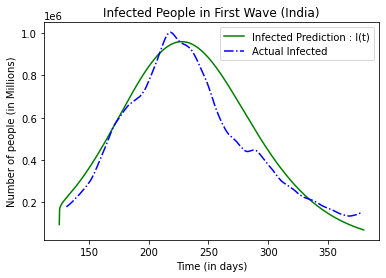

In [76]:
# Numerical Solution for Differential Equations using scipy
t = np.linspace(125, 380, 1000)
x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
sol1 = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

#Plot of actual cases and predicted cases

# plt.plot(t, sol1[:, 0] + sol1[:, 1], 'r', label='S(t)')
plt.plot(t, sol1[:, 5] + sol1[:, 6] + sol1[:,7], 'g', label='Infected Prediction : I(t)')
# plt.plot(t, sol1[:,-1], 'black', label='R(t)')
# plt.plot((sol1[:, 0] + sol1[:, 1])/(V0 + NV0),(sol1[:, 5] + sol1[:, 6])/(I0 + Im0))
plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
# plt.ylim(0)
plt.title('Infected People in First Wave (India)')
plt.show()

## Prediction of cases for Second Wave

In [117]:
#Initial Conditions
V0 = 2000
NV0 = 1.4 * 10**9
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 300000
Im0 = 250000
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)

alpha = 0.3 *3.5
alpham = 0.4 *3.5

fra = 0.9 #fraction of ppl not going hopital after 7days
zeta = 0.1 * 3.5
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days
kq = 0.3 * 3.5

b = 17.9/1000 * 1/365
d = 6.2/1000 * 1/365
mu = 0.01
dR = 5/100 * 1/365

i = 0.225
sigma0 = 0.25    * 1   * 1.25/i * 3.5
sigma0m = 0.25   * 1.5 * 1.25/i * 3.5
sigma1 = 0.1785  * 1   * 1.25/i * 3.5
sigma1m = 0.1785 * 1.5 * 1.25/i * 3.5
sigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days

j = 0.155
gamma = 0.05    /j * 3.5
gammah = 0.04   /j * 3.5
gammam = 0.0333 /j * 3.5

eta = 0.033 * 3.5
etam = 0.063 * 3.5


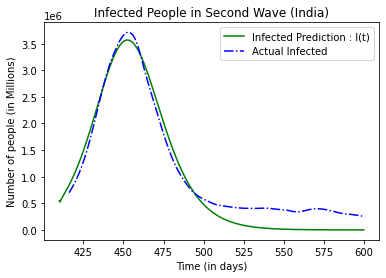

In [118]:
# Numerical Solution for Differential Equations using scipy
t = np.linspace(410, 600, 1000)
x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
sol2 = odeint(dxdt, x0, t , args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

#Plot of actual cases and predicted cases

# plt.plot(t, sol[:, 0] + sol[:, 1], 'r', label='S(t)')
plt.plot(t, sol2[:, 5] + sol2[:, 6] + sol2[:,7], 'g', label='Infected Prediction : I(t)')
# plt.plot(t, sol[:,-1], 'black',( label='R(t)')
# plt.plot((sol[:, 0] + sol[:, 1])/(V0 + NV0),(sol[:, 5] + sol[:, 6])/(I0 + Im0))
plt.plot(second_wave, 'b-.', label ='Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
plt.title('Infected People in Second Wave (India)')
plt.show()


## Varying parameters

In [77]:
#Initial Conditions
V0 = 1000
NV0 = 1.4 * 10**9
CV0 = 1000
CNV0 = 10 ** 5
CQ0 = 0
I0 = 50000
Im0 = 45000
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)

alpha = 0.35  *2.2
alpham = 0.4  *2.2

# alpha = [lambda x: alpha0 * np.exp(-0.01 * t)  for t in range(125, 380)]

fra = 0.95 #fraction of ppl not going hopital after 7days
zeta = 0.25 *2.2
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days
kq = 0.3 *2.2

b = 17.9/1000 * 1/365
d = 6.2/1000 * 1/365
mu = 0.005
dR = 5/100 * 1/365

i = 0.22
sigma0 = 0.25    * 1   * 1.25/i *2.2
sigma0m = 0.25   * 1.5 * 1.25/i *2.2
sigma1 = 0.1785  * 1   * 1.25/i *2.2
sigma1m = 0.1785 * 1.5 * 1.25/i *2.2
sigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days

j = 0.1445
gamma = 0.05    /j *2.2
gammah = 0.04   /j *2.2
gammam = 0.0333 /j *2.2

eta = 0.035 *2.2
etam = 0.055 *2.2

[950512.361244017, 955313.5953847881, 960162.6301370444, 965053.8662561985, 969996.287474637]
0.5072198482677954


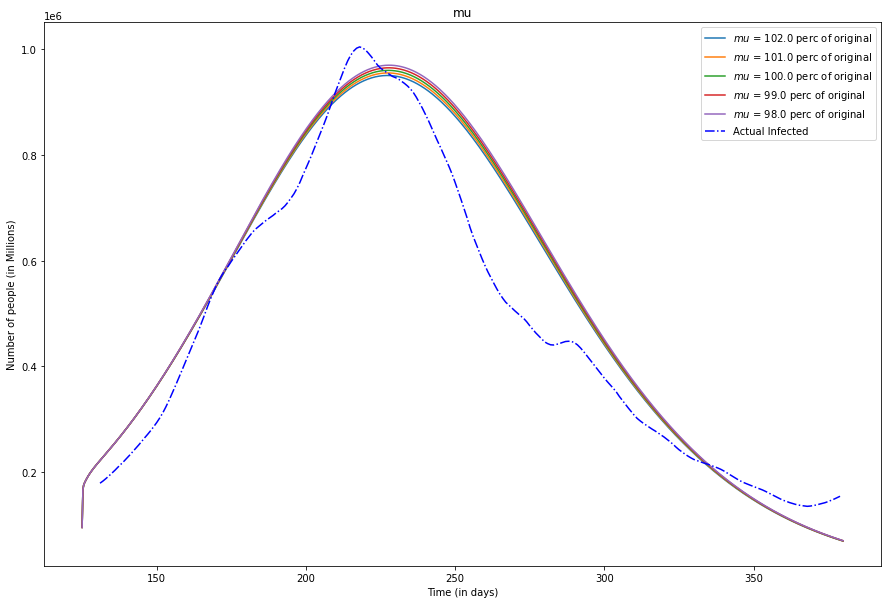

In [78]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(mu * i)
plt.figure(figsize=(15,10))

Max_active = []
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(H[i],b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$mu$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('mu')
plt.show()



In [79]:
'''
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(mu * i)
plt.figure(figsize=(15,10))
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(H[i],b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    susceptible = sol[:, 0] + sol[:, 1]

    plt.plot(susceptible,active, label='$mu$ = %0.1f perc of original'%(list[i]*100))
    print('Max of list[%d]'%i, active.max())    

# plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
# plt.xlabel('Time (in days)')
# plt.ylabel('Number of people (in Millions)')
plt.xlabel('susceptible')
plt.ylabel('infected')
#plt.xlim(125,150)
plt.title('mu')
plt.show()
'''

"\n# Numerical Solution for Differential Equations using scipy\nlist = [1.02, 1.01, 1.0, 0.99, 0.98]\nH = []\nfor i in list:\n    H.append(mu * i)\nplt.figure(figsize=(15,10))\nfor i in range(len(H)):\n    t = np.linspace(125, 380, 1000)\n    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0\n    sol = odeint(dxdt, x0, t * 1, args=(H[i],b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))\n\n    active = sol[:, 5] + sol[:, 6] + sol[:,7]\n    susceptible = sol[:, 0] + sol[:, 1]\n\n    plt.plot(susceptible,active, label='$mu$ = %0.1f perc of original'%(list[i]*100))\n    print('Max of list[%d]'%i, active.max())    \n\n# plt.plot(first_wave, 'b-.' , label = 'Actual Infected')\nplt.legend(loc='upper right')\n# plt.xlabel('Time (in days)')\n# plt.ylabel('Number of people (in Millions)')\nplt.xlabel('susceptible')\nplt.ylabel('infected')\n#plt.xlim(125,150)\nplt.title('mu')\nplt.show()\n"

[932381.0490394277, 946155.3500838897, 960162.6301370444, 974404.8718440579, 988890.9035200668]
1.4710800479777155


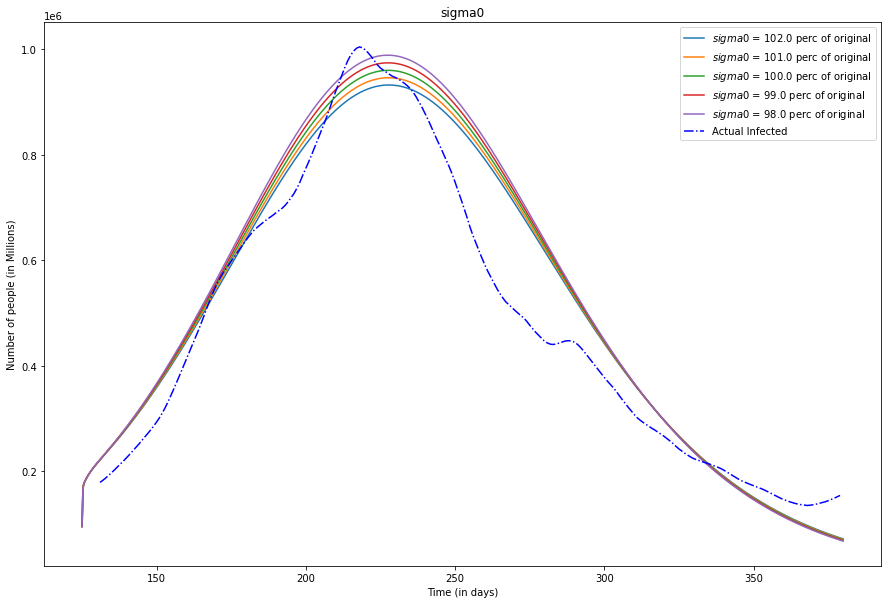

In [80]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(sigma0 * i)
plt.figure(figsize=(15,10))

Max_active = []
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,H[i],sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$sigma0$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)
    
plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('sigma0')
plt.show()

[737354.7345174893, 842163.1385378637, 960162.6301370444, 1092034.1895492447, 1238429.0881664662]
13.01191293894227


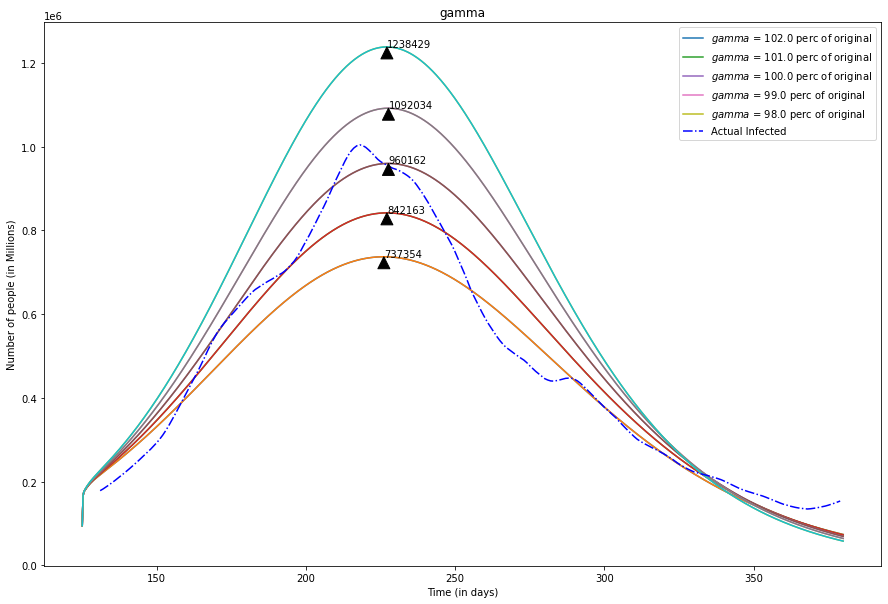

In [81]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(gamma * i)

Max_active = []
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , H[i],zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$gamma$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())


    line, = ax.plot(t, active)

    ymax = max(active)
    xpos = np.where(active == ymax)
    xmax = t[xpos]

    ax.annotate('%d'%Max_active[i], xy=(xmax, ymax), xytext=(xmax, ymax + 5), arrowprops=dict(facecolor='black'),)

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity) 

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('gamma')
plt.show()

[558798.0380562425, 735692.9497189851, 960162.6301370444, 1234639.107102405, 1560495.1936914106]
25.982377449547542


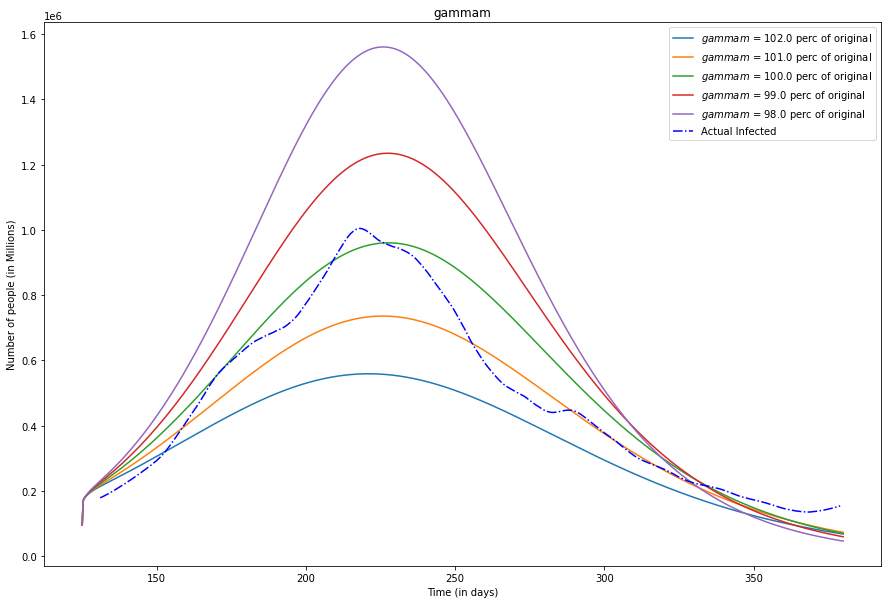

In [82]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(gammam * i)

Max_active =[]
plt.figure(figsize=(15,10))
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta ,etam, gammah ,H[i] , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$gammam$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)
plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('gammam')
plt.show()

[957296.496474318, 958715.4463878282, 960162.6301370444, 961638.8780228406, 963145.2516088411]
0.15223627452544797


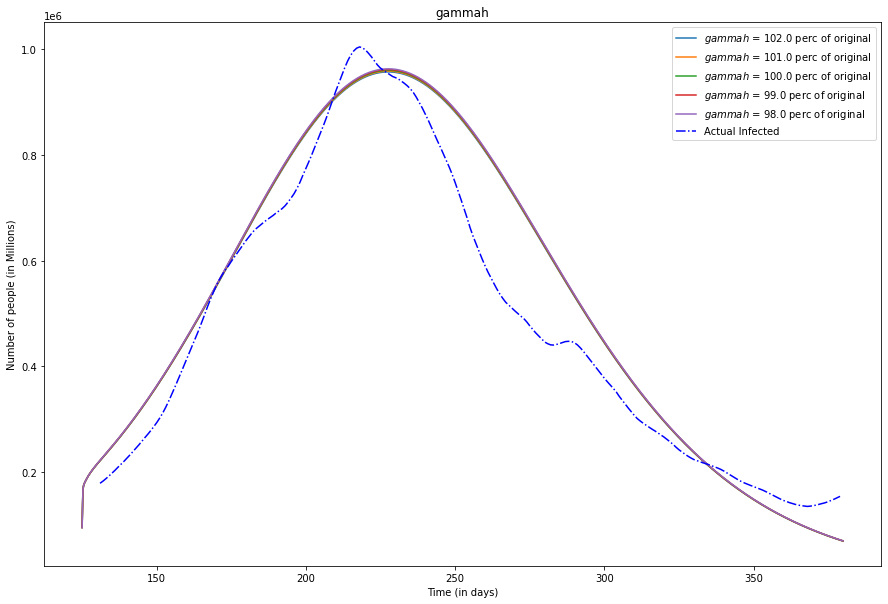

In [83]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(gammah * i)

Max_active = []
plt.figure(figsize=(15,10))
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , H[i] ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$gammah$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('gammah')
plt.show()

[1263213.74028943, 1104699.2941649714, 960162.6301370444, 829708.5819627049, 713343.3475902294]
14.320007026466811


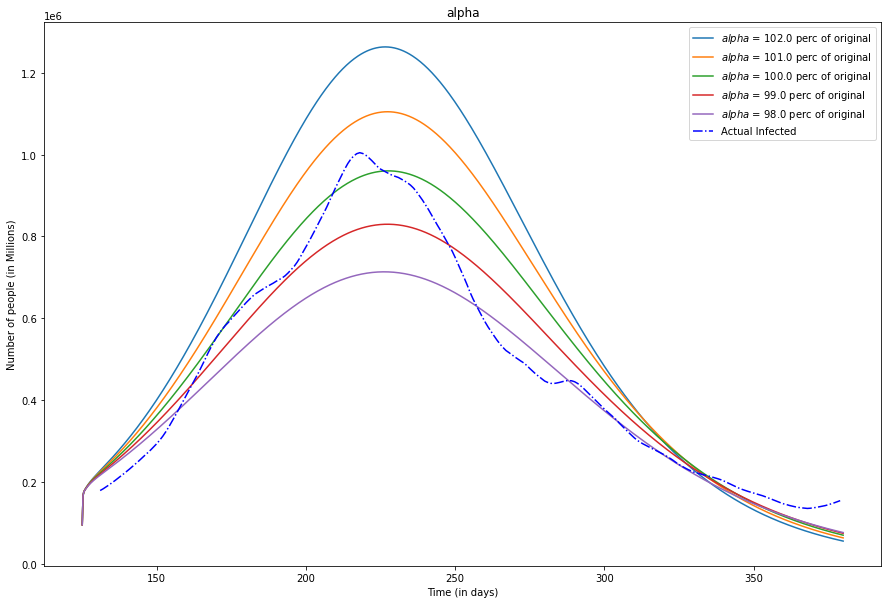

In [84]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(alpha * i)

Max_active = []
plt.figure(figsize=(15,10))
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,H[i], alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$alpha$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('alpha')
plt.show()

[1724965.8794022799, 1307534.7719792002, 960162.6301370444, 684809.1176038276, 480560.84579201246]
32.428134298795335


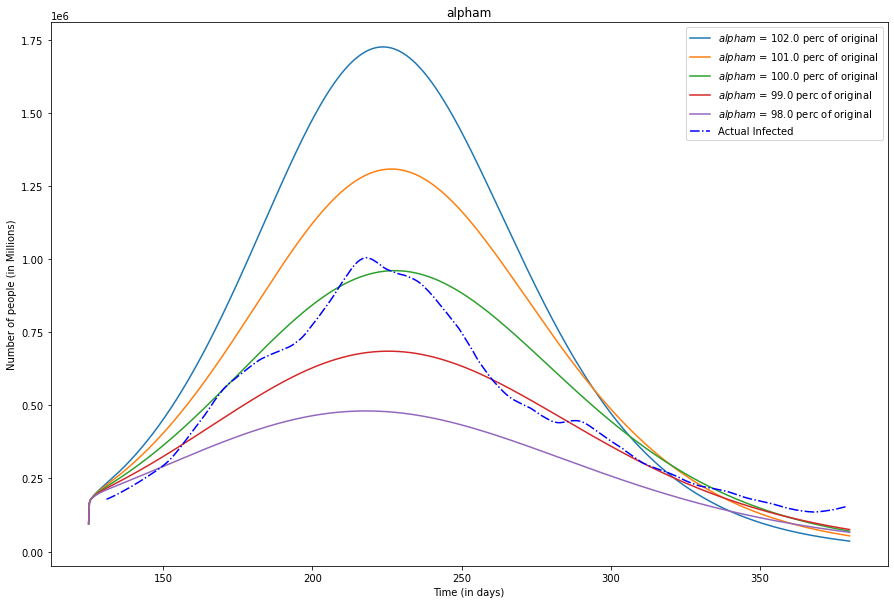

In [85]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(alpham * i)

Max_active = []
plt.figure(figsize=(15,10))
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, H[i],sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$alpham$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('alpham')
plt.show()

[935859.274596401, 947945.0843456105, 960162.6301370444, 972512.4332245423, 984995.5031496766]
1.2793326936409373


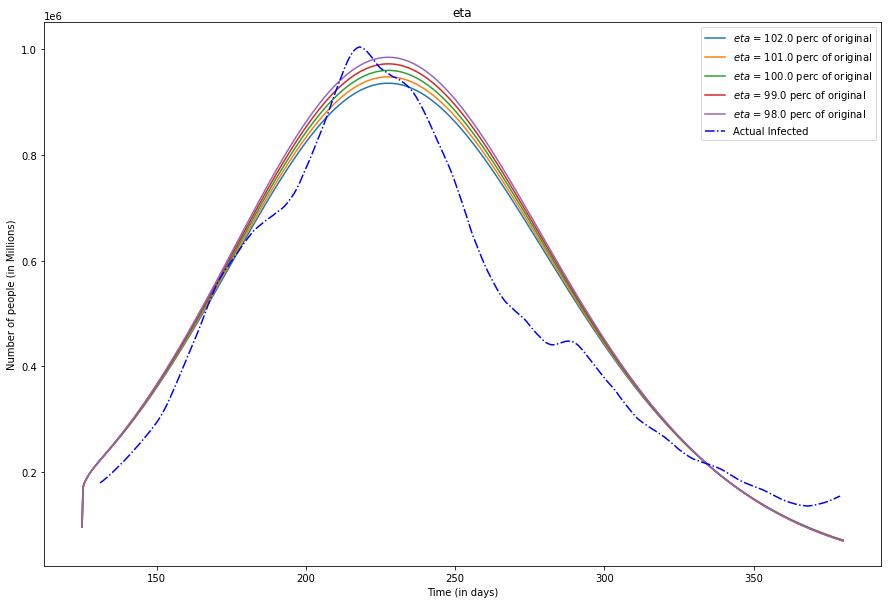

In [86]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(eta * i)

Max_active = []
plt.figure(figsize=(15,10))
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,H[i] , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$eta$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('eta')
plt.show()

[848795.2643001808, 903128.246354867, 960162.6301370444, 1019913.9564444438, 1082397.8408692281]
6.081558812224754


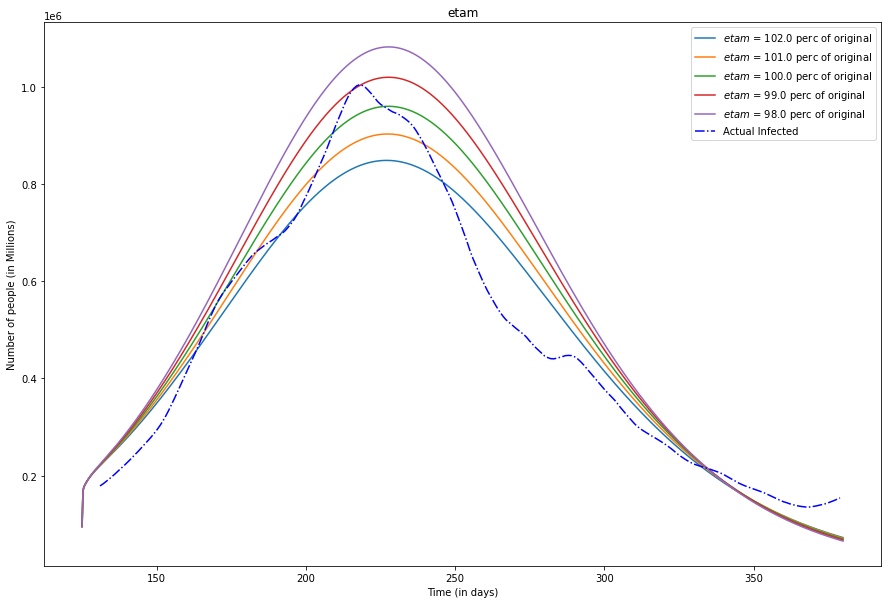

In [87]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(etam * i)

Max_active  =[]
plt.figure(figsize=(15,10))
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , H[i] , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$etam$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('etam')
plt.show()

[902425.7906187146, 930941.656112634, 960162.6301370444, 990083.3420681463, 1020706.6307136128]
3.0797744100429645


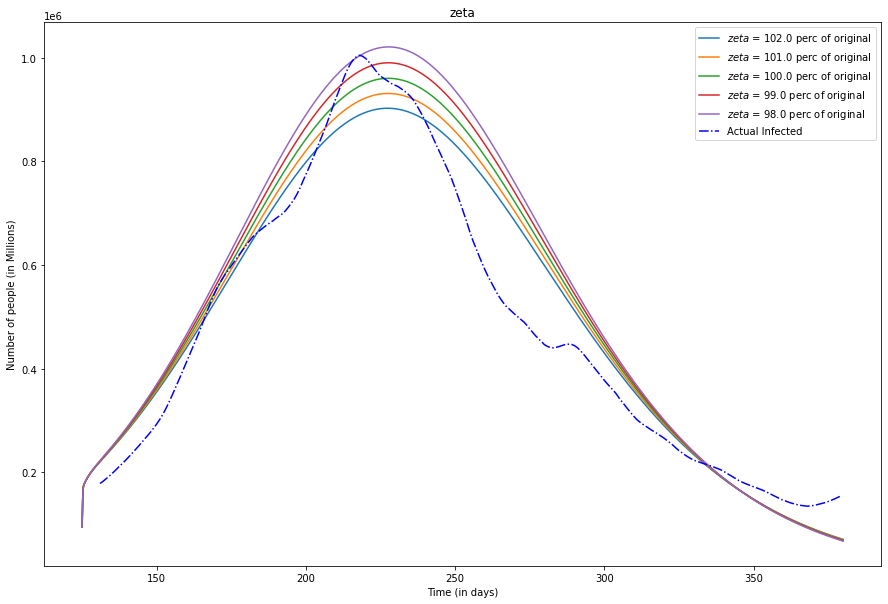

In [88]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(zeta * i)

plt.figure(figsize=(15,10))
Max_active = []
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,H[i],sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$zeta$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)


plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('zeta')
plt.show()

[891094.0922363002, 925117.5815396354, 960162.6301370444, 996226.5126315653, 1033313.9716682835]
3.7029628554581686


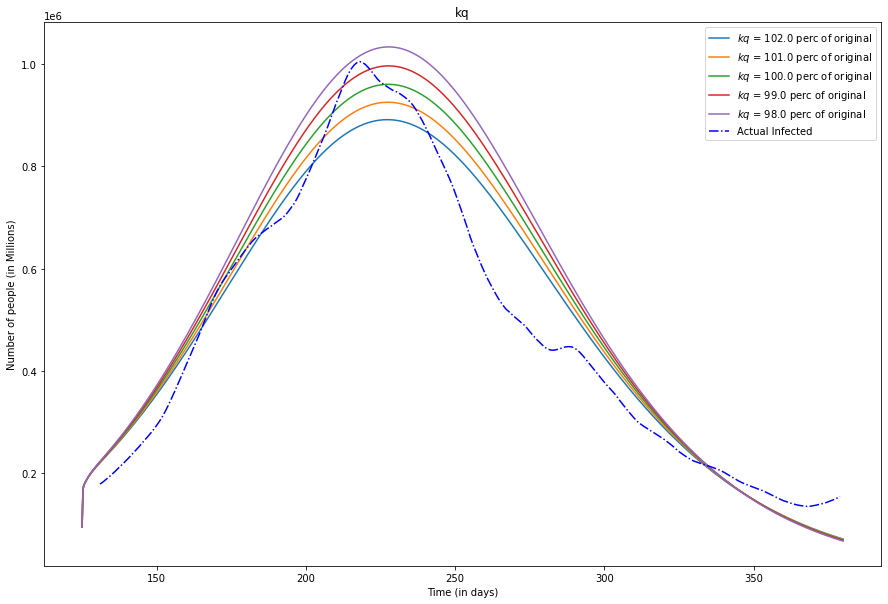

In [89]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(kq * i)

plt.figure(figsize=(15,10))
Max_active = []
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,H[i],sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$kq$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)
plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('kq')
plt.show()

[960213.7392981382, 960188.1843203778, 960162.6301370444, 960136.942202799, 960111.2310354317]
0.0026684082451444717


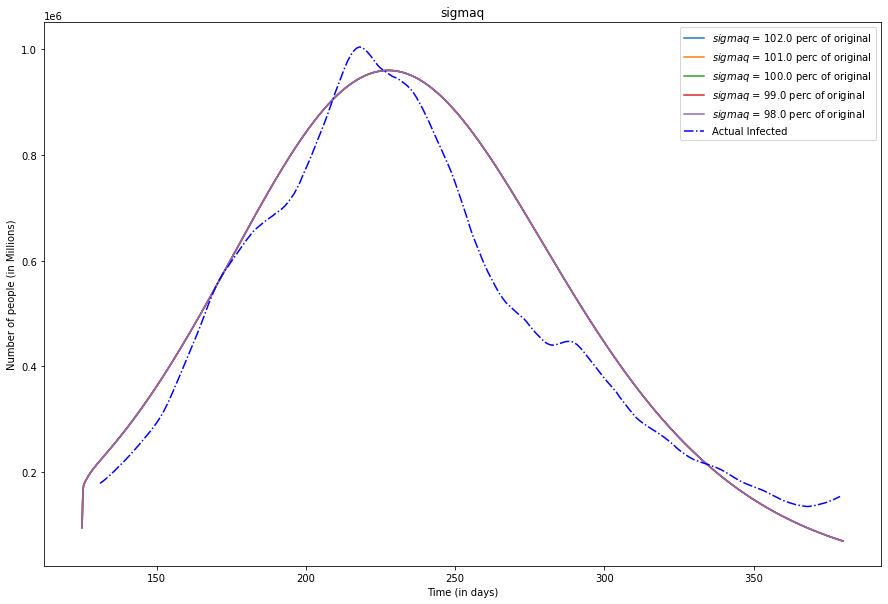

In [90]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(sigmaq * i)

plt.figure(figsize=(15,10))
Max_active = []
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,H[i] ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$sigmaq$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('sigmaq')
plt.show()

[1085809.2103378898, 1021990.9953958674, 960162.6301370444, 900364.656895448, 842645.1131724066]
6.333632172450809


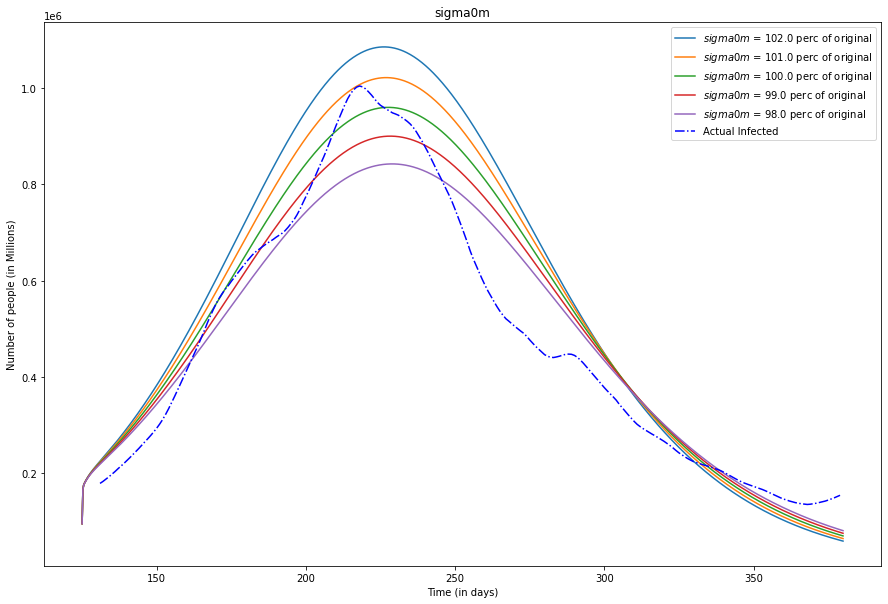

In [91]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(sigma0m * i)

plt.figure(figsize=(15,10))
Max_active = []
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,H[i],kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$sigma0m$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('sigma0m')
plt.show()

[955559.5198856601, 957846.6364447451, 960162.6301370444, 962498.3163735345, 964861.6773510786]
0.2422339603096949


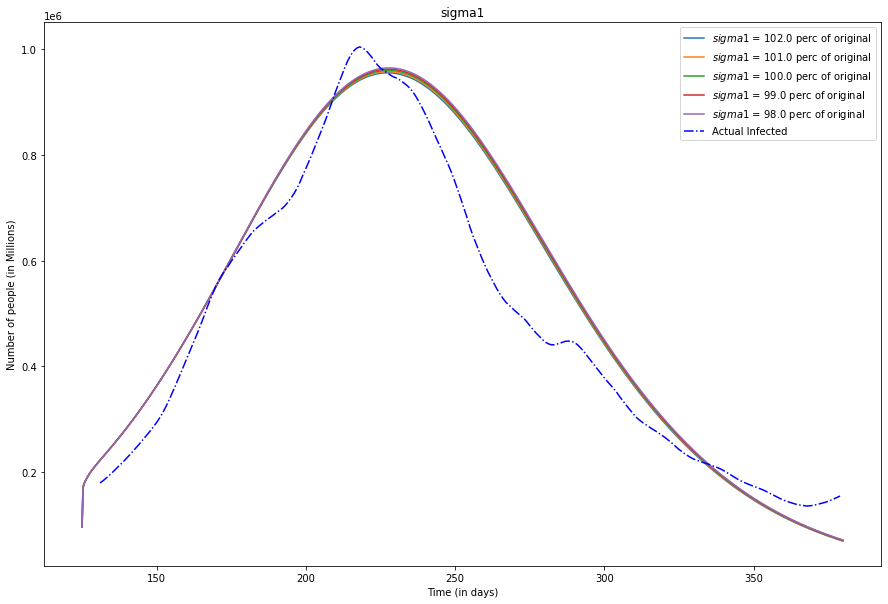

In [92]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(sigma1 * i)

plt.figure(figsize=(15,10))
Max_active = []
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,H[i],sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$sigma1$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('sigma1')
plt.show()

[1004675.2714626521, 982195.7075237284, 960162.6301370444, 938581.6665494409, 917465.0932787094]
2.2711798816864173


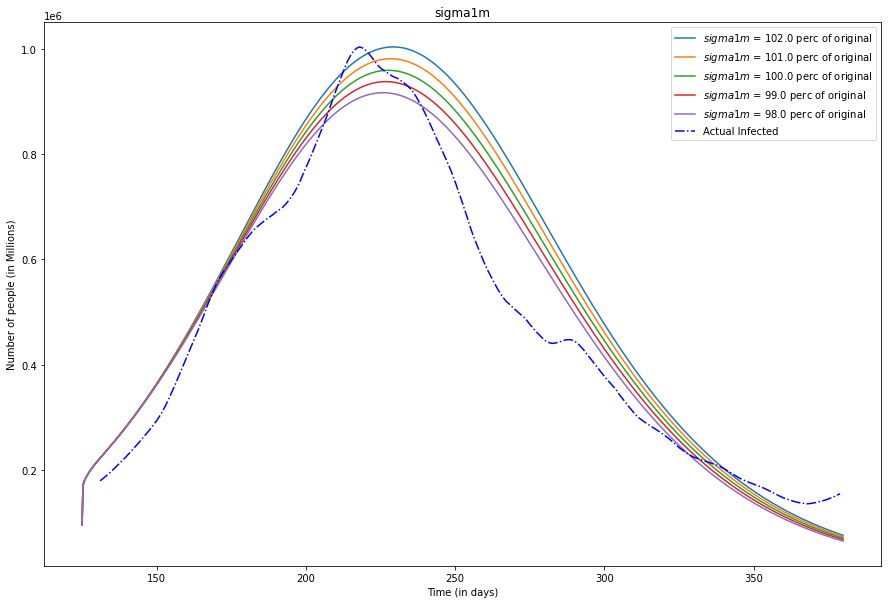

In [93]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(sigma1m * i)

plt.figure(figsize=(15,10))
Max_active = []
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,H[i],zeta,sigma0,sigma0m,kq,sigmaq,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$sigma1m$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('sigma1m')
plt.show()

[960243.0658987291, 960203.1196048763, 960162.6301370444, 960121.467485669, 960079.7059978185]
0.004251994227043502


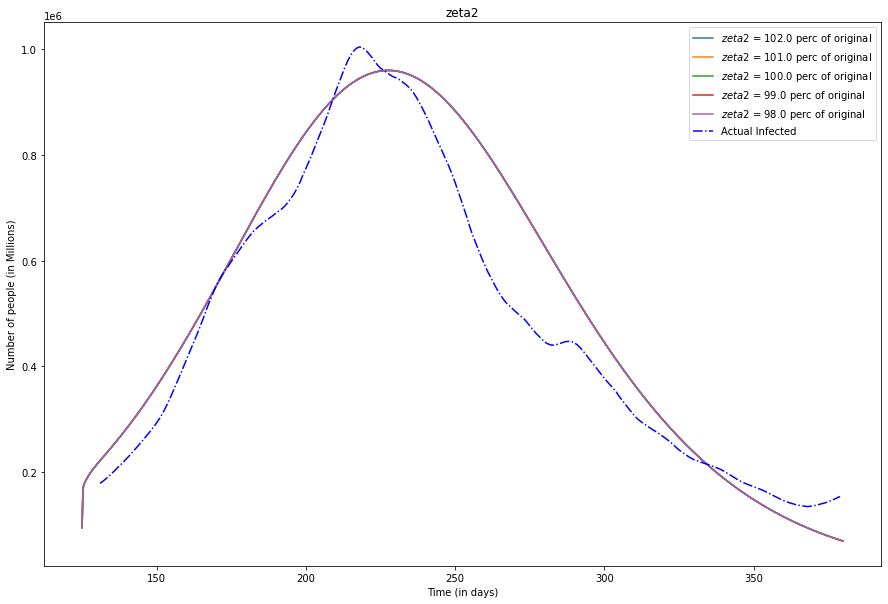

In [94]:
# Numerical Solution for Differential Equations using scipy
list = [1.02, 1.01, 1.0, 0.99, 0.98]
H = []
for i in list:
    H.append(zeta2 * i)

plt.figure(figsize=(15,10))
Max_active = []
for i in range(len(H)):
    t = np.linspace(125, 380, 1000)
    x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
    sol = odeint(dxdt, x0, t * 1, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,H[i], dR,N ))

    active = sol[:, 5] + sol[:, 6] + sol[:,7]
    plt.plot(t, active, label='$zeta2$ = %0.1f perc of original'%(list[i]*100))
    Max_active.append(active.max())

print(Max_active)
senstivity = np.absolute(Max_active[1] - Max_active[3])/(2*0.01*Max_active[2])
print(senstivity)

plt.plot(first_wave, 'b-.' , label = 'Actual Infected')
plt.legend(loc='upper right')
plt.xlabel('Time (in days)')
plt.ylabel('Number of people (in Millions)')
#plt.xlim(125,150)
plt.title('zeta2')
plt.show()